<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Dataset-description" data-toc-modified-id="Dataset-description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset description</a></span></li><li><span><a href="#Importing-libraries-and-dataset" data-toc-modified-id="Importing-libraries-and-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Importing libraries and dataset</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Model-selection" data-toc-modified-id="Model-selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model selection</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Model-training" data-toc-modified-id="Model-training-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model training</a></span></li><li><span><a href="#Test-set-prediction" data-toc-modified-id="Test-set-prediction-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Test set prediction</a></span></li></ul></div>

# Introduction

Company Introduction
Your client for this project is a pharmaceutical company.

They have a long history of making effective drugs and are the leading producer of antibiotics for bacterial infection.
Their research and development team have recently developed five types of drugs to fight against chronic throat infection.
They want to quickly release the drug in the market so that they could cure people and increase revenue for the company.
Their R&D team made a brief analysis of the chemical composition present in the drug and made a brief report stating that each drug has a different effect according to their health.
The drug which has a higher concentration of chemicals should be given to those groups of people whose health report passes some criteria as suggested by the R&D team.

Current Scenario
The R&D group has invited some groups of people to test the drug, but going through each person’s health report might take a lot of time and cause a delay in launching the drug in the market.




The current process suffers from the following problems:

Testing phase takes a lot of time and it's done manually because they need to carefully examine each person for the side effects.
Most of the crucial time is being wasted in checking each person’s health report and dispensing specific drugs according to the health metric as suggested by the R&D team.
This process is time-consuming and wastage of resources.

The company has hired you as data science consultants. They want to automate the process of assigning the drug according to their health report.


Deliverable: Drug classification.
Machine Learning Task: Multi-class classification
Target Variable: Drug

# Dataset description

In [ ]:

"" """"
Dataset Feature Description
The Dataset contains the following columns:

Column Name	Description
Id	Unique Id of the sample
Age	Age of the person
Sex	The sex of the person(M and F)
BP	Blood pressure of the person
Cholesterol	The level of cholesterol in a person's body
Na_to_K	Sodium and potassium ratio
Drug	Contains 5 classes of drugs (drug A, drug B, drug C, drug X, drug Y)
""""""

# Importing libraries and dataset

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('drug_train.csv')
df

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,79,32,F,LOW,NORMAL,10.840,drugX
1,197,52,M,NORMAL,HIGH,9.894,drugX
2,38,39,F,NORMAL,NORMAL,9.709,drugX
3,24,33,F,LOW,HIGH,33.486,DrugY
4,122,34,M,NORMAL,HIGH,22.456,DrugY
...,...,...,...,...,...,...,...
155,106,22,M,NORMAL,HIGH,11.953,drugX
156,14,50,F,NORMAL,HIGH,12.703,drugX
157,92,29,F,HIGH,HIGH,29.450,DrugY
158,179,67,F,NORMAL,HIGH,15.891,DrugY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           160 non-null    int64  
 1   Age          160 non-null    int64  
 2   Sex          160 non-null    object 
 3   BP           160 non-null    object 
 4   Cholesterol  160 non-null    object 
 5   Na_to_K      160 non-null    float64
 6   Drug         160 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.9+ KB


In [ ]:
df.describe()

,Id,Age,Na_to_K
count,160.000000,160.000000,160.000000
mean,99.075000,45.387500,16.194988
std,59.374894,16.101481,7.254689
min,0.000000,15.000000,6.269000
25%,45.500000,32.000000,10.445250
50%,100.500000,46.000000,14.076500
75%,149.500000,58.250000,19.480750
max,199.000000,74.000000,38.247000


In [ ]:
df.shape

(160, 7)

# EDA

In [ ]:
import pandas_profiling as pp

In [ ]:
profile = pp.ProfileReport(df, title = "EDA")
profile.to_notebook_iframe()

In [ ]:
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

     |████████████████████████████████| 51kB 1.7MB/s 
Imported AutoViz_Class version: 0.0.83. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


Shape of your Data Set loaded: (160, 7)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    6 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
    List of variables removed: ['Id']

################ Multi_Classification VISUALIZATION Started #####################
Data Set Shape: 160 rows, 6 cols
Data Set columns info:
* Age: 0 nulls, 53 unique vals, most common: {39: 6, 23: 6}
* Sex:

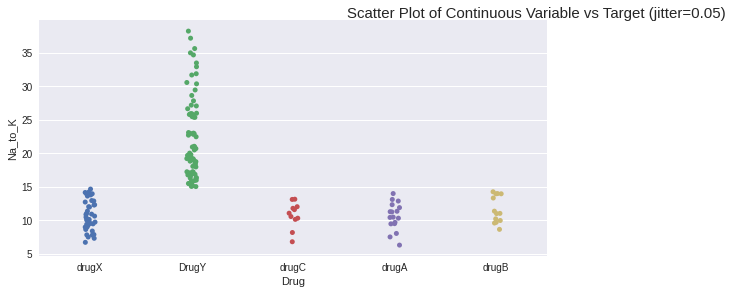

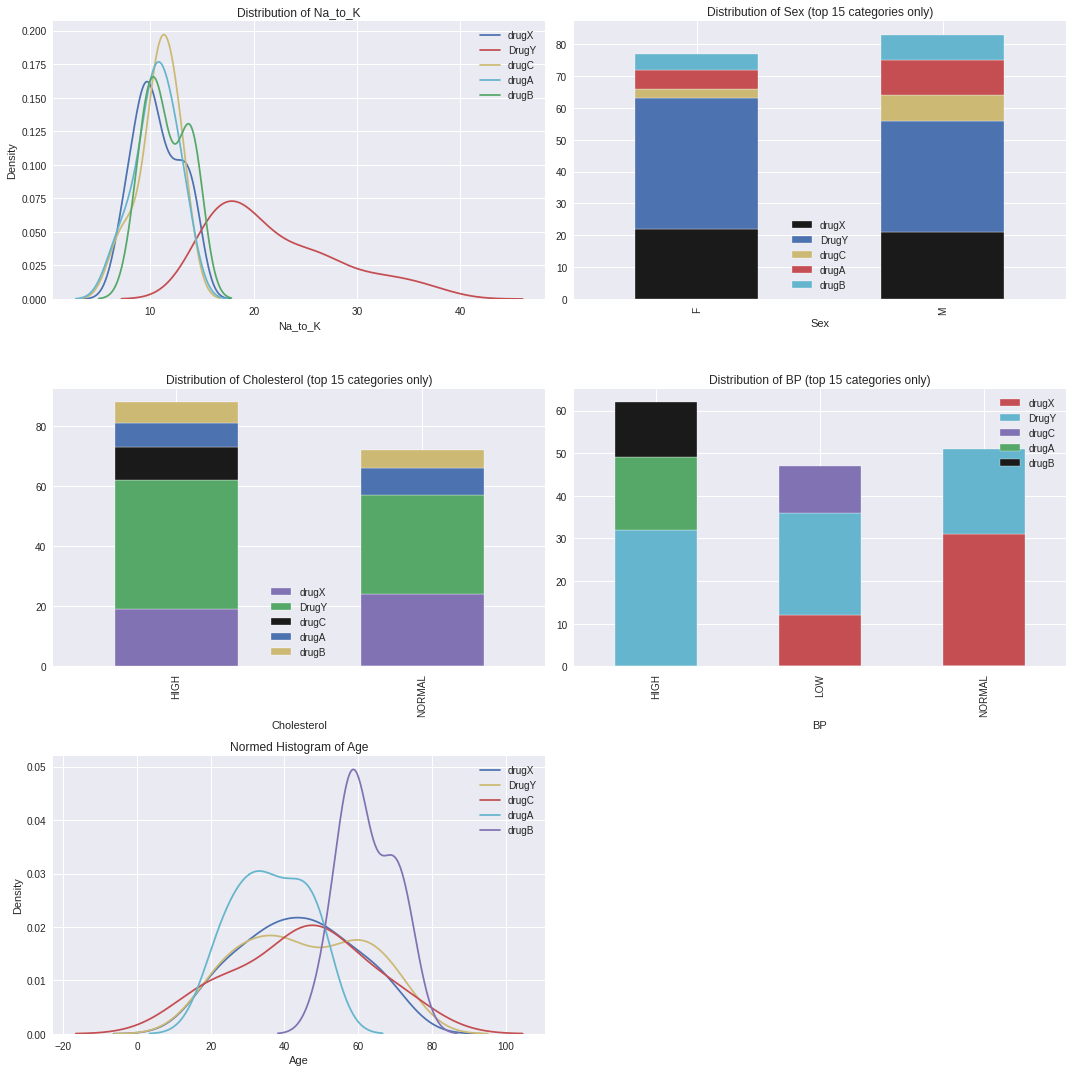

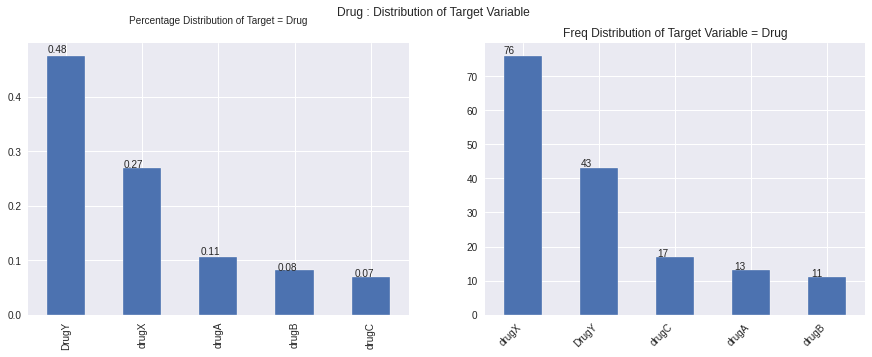

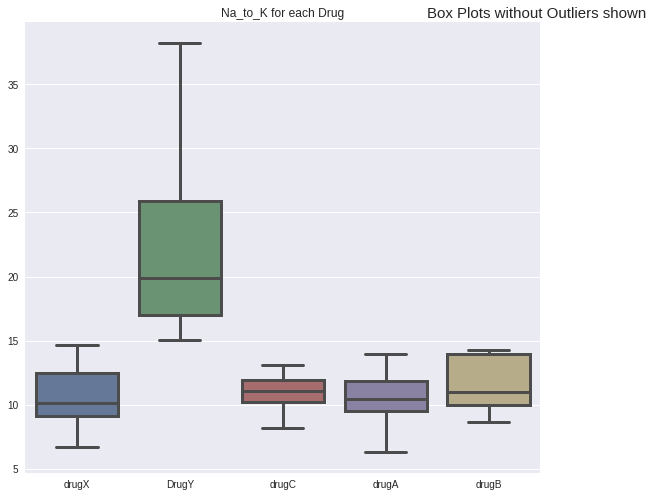

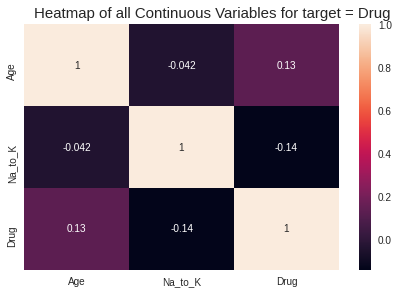

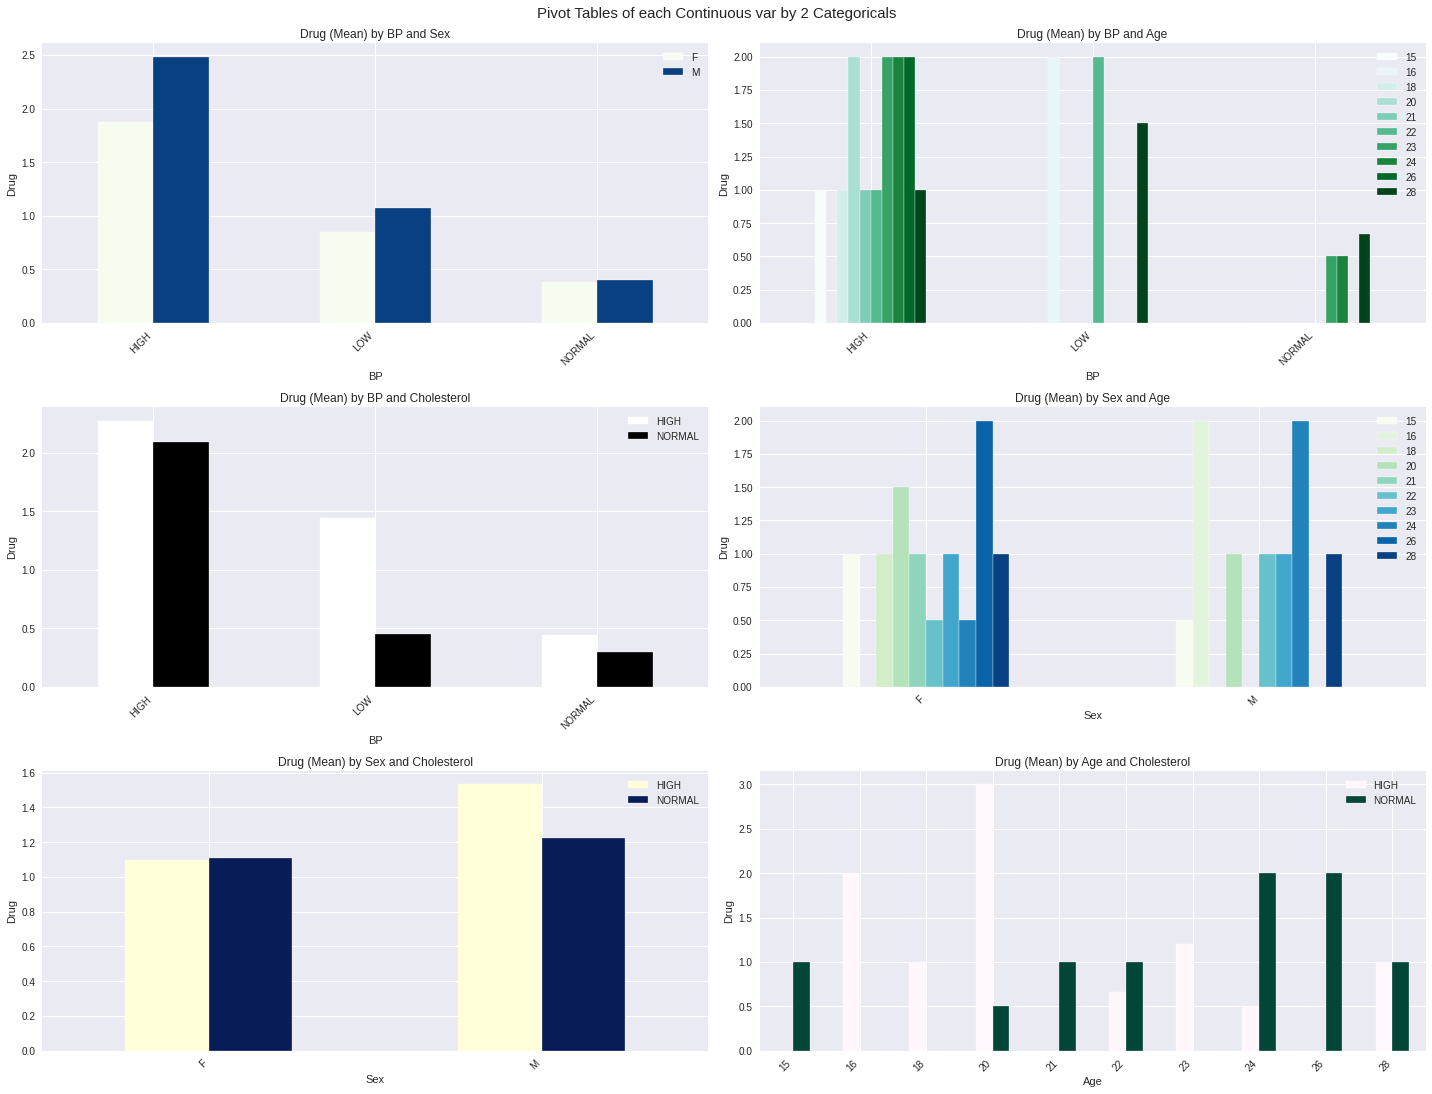

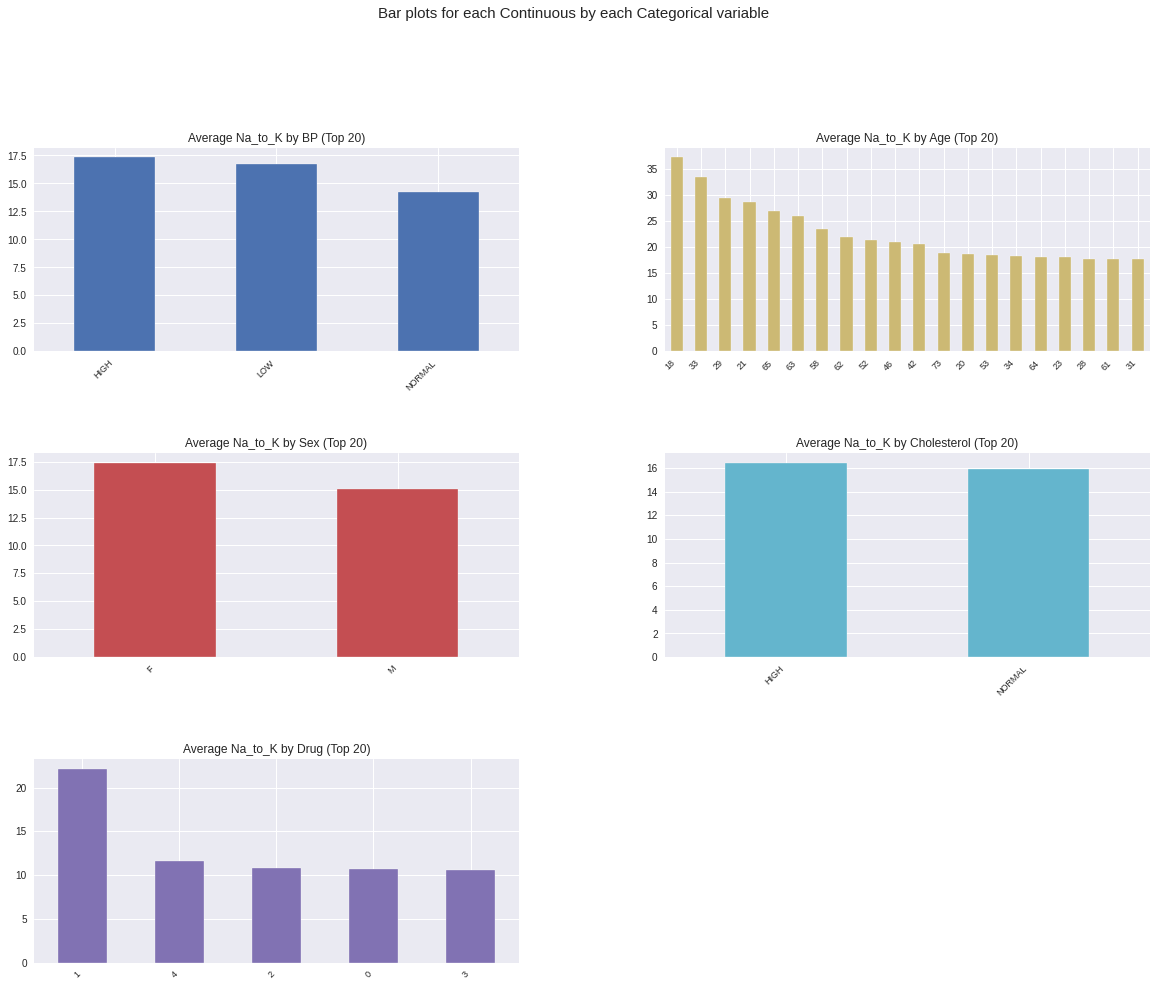

Time to run AutoViz (in seconds) = 6.054

 ###################### VISUALIZATION Completed ########################


In [ ]:
viz = AV.AutoViz(filename="",sep=',', depVar='Drug', dfte=df, header=0, verbose=1, 
                 lowess=False, chart_format='svg')


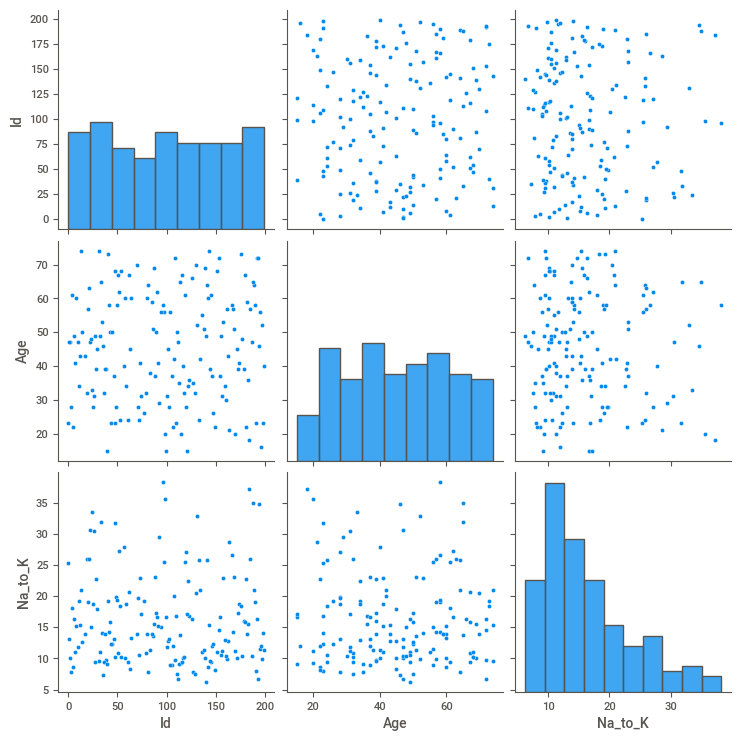

In [ ]:
sns.pairplot(df)

# Model selection

In [ ]:
from pycaret.classification import *

In [ ]:
clf1 = setup(data = df, 
          target = 'Drug')

,Description,Value
0,session_id,4875
1,Target,Drug
2,Target Type,Multiclass
3,Label Encoded,"DrugY: 0, drugA: 1, drugB: 2, drugC: 3, drugX: 4"
4,Original Data,"(160, 7)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9818,0.9867,0.9733,0.9788,0.9783,0.9735,0.9757,0.017
lightgbm,Light Gradient Boosting Machine,0.9818,0.9991,0.9600,0.9750,0.9779,0.9732,0.9741,0.096
rf,Random Forest Classifier,0.9727,0.9991,0.9533,0.9652,0.9662,0.9604,0.9636,0.463
gbc,Gradient Boosting Classifier,0.9727,0.9943,0.9533,0.9624,0.9652,0.9602,0.9636,0.336
lr,Logistic Regression,0.9182,0.9955,0.8917,0.9142,0.9050,0.8845,0.8942,0.549
et,Extra Trees Classifier,0.8727,0.9918,0.8243,0.8518,0.8519,0.8165,0.8282,0.445
ridge,Ridge Classifier,0.8644,0.0000,0.8193,0.8503,0.8418,0.8055,0.8222,0.016
lda,Linear Discriminant Analysis,0.8212,0.9827,0.8453,0.8669,0.8014,0.7594,0.7880,0.017
ada,Ada Boost Classifier,0.8106,0.9476,0.5933,0.6940,0.7406,0.7216,0.7405,0.093
nb,Naive Bayes,0.7576,0.9489,0.8340,0.8651,0.7478,0.6802,0.7195,0.016


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4875, splitter='best')

In [ ]:
dt  = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9091,0.9500,0.8000,0.8636,0.8788,0.8690,0.8796
9,0.9091,0.9167,0.9333,0.9242,0.9041,0.8659,0.8771


In [ ]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9091,0.9500,0.8000,0.8636,0.8788,0.8690,0.8796
9,0.9091,0.9167,0.9333,0.9242,0.9041,0.8659,0.8771


In [ ]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=11, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4875, splitter='best')

In [ ]:
predictions = predict_model(dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
predictions = predict_model(tuned_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Data preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           160 non-null    int64  
 1   Age          160 non-null    int64  
 2   Sex          160 non-null    object 
 3   BP           160 non-null    object 
 4   Cholesterol  160 non-null    object 
 5   Na_to_K      160 non-null    float64
 6   Drug         160 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.9+ KB


In [7]:
df.drop(columns=['Id'],axis=1,inplace=True)

In [8]:
num=['Age','Na_to_K']

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[(num)]=scaler.fit_transform(df[(num)])

In [6]:
temp = []
for i in df.Drug:
  if i == 'drugX':
    temp.append(0)     
  elif i =='DrugY':
    temp.append(1)
      
  elif i =='drugC':
    temp.append(2)
  elif i =='drugA':
    temp.append(3)
  elif i =='drugB':
    temp.append(4)
df['Drugs'] = temp
df.drop(['Drug'],axis=1,inplace=True)

In [27]:
df.Drugs

0      0
1      0
2      0
3      1
4      1
      ..
155    0
156    0
157    1
158    1
159    2
Name: Drugs, Length: 160, dtype: int64

In [10]:
df = pd.get_dummies(df)
df.head()

,Age,Na_to_K,Drugs,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,-0.834056,-0.740459,0,1,0,0,1,0,0,1
1,0.411966,-0.871267,0,0,1,0,0,1,1,0
2,-0.397948,-0.896848,0,1,0,0,0,1,0,1
3,-0.771755,2.390909,1,1,0,0,1,0,1,0
4,-0.709454,0.865739,1,0,1,0,0,1,1,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 160 non-null    float64
 1   Na_to_K             160 non-null    float64
 2   Drugs               160 non-null    int64  
 3   Sex_F               160 non-null    uint8  
 4   Sex_M               160 non-null    uint8  
 5   BP_HIGH             160 non-null    uint8  
 6   BP_LOW              160 non-null    uint8  
 7   BP_NORMAL           160 non-null    uint8  
 8   Cholesterol_HIGH    160 non-null    uint8  
 9   Cholesterol_NORMAL  160 non-null    uint8  
dtypes: float64(2), int64(1), uint8(7)
memory usage: 5.0 KB


In [12]:
df.head()

,Age,Na_to_K,Drugs,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,-0.834056,-0.740459,0,1,0,0,1,0,0,1
1,0.411966,-0.871267,0,0,1,0,0,1,1,0
2,-0.397948,-0.896848,0,1,0,0,0,1,0,1
3,-0.771755,2.390909,1,1,0,0,1,0,1,0
4,-0.709454,0.865739,1,0,1,0,0,1,1,0


# Model training

In [14]:
X = df.drop(columns=['Drugs'], axis=1)
y = df['Drugs']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, X, y):
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, y, cv=5,scoring='accuracy')
    print("Cross validation is",np.mean(score)*100)
    

In [29]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model, X, y)

Accuracy is 100.0
Cross validation is 99.375


In [30]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print("accuracy score",accuracy_score(y_test,y_pred))

[[14  0  0  0  0]
 [ 0 18  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

accuracy score 1.0


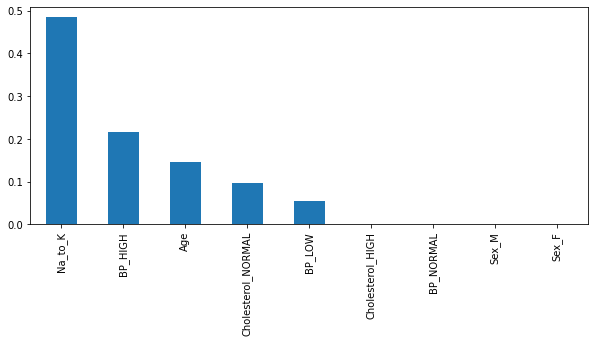

In [19]:
f_imp = pd.Series(model.feature_importances_)
f_imp.index = x_train.columns
f_imp.sort_values(ascending=False).plot.bar(figsize=(10, 4))

# Test set prediction

In [20]:
df1=pd.read_csv('drug_test.csv')

In [21]:
df1.drop(columns=['Id'],inplace=True)

In [22]:
df1[(num)]=scaler.transform(df1[(num)])

In [23]:
df1.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,-0.584851,M,LOW,NORMAL,-0.659707
1,-1.830873,F,HIGH,NORMAL,-0.093887
2,-1.706271,F,NORMAL,NORMAL,-1.029453
3,0.848073,F,LOW,HIGH,-0.795216
4,0.100460,M,LOW,NORMAL,2.398652


In [24]:
df1 = pd.get_dummies(df1)
df1.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,-0.584851,-0.659707,0,1,0,1,0,0,1
1,-1.830873,-0.093887,1,0,1,0,0,0,1
2,-1.706271,-1.029453,1,0,0,0,1,0,1
3,0.848073,-0.795216,1,0,0,1,0,1,0
4,0.100460,2.398652,0,1,0,1,0,0,1


In [31]:
final_pred=model.predict(df1)

In [32]:
prediction = pd.DataFrame(final_pred).to_csv('submission.csv')